## Task 01

*Data collection & Initial analysis.*

Importing necessary libraries

In [1]:
# Importing Numpy as np
import numpy as np
# Importing pandas as pd
import pandas as pd
# Importing Matplotlibrary's PyPlot as plt
import matplotlib.pyplot as plt
# Importing seaborn as sns
import seaborn as sns
# Importing sklearn
import sklearn

In [2]:
# Reading the csv file into Pandas Dataframe 
Churn_Data = pd.read_csv('churn.csv')
# Displaying the first 5 rows
pd.set_option('display.max_columns', None)
Churn_Data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Getting the basic details of the dataframe
Churn_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
Churn_Data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# Checking the details of features with Object datatype
Churn_Data.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


### Notes :
* Column 'TotalCharges' with float64 datatype is in object format
* Column 'customerID' can be avoided

## Task 02

*Pre-processing.*

1. Feature reduction

In [6]:
# Dropping obsolete columns
Churn_Data_01 = Churn_Data.drop(columns=["customerID"])
Churn_Data_01.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


2. Changing the wrong datatypes

In [7]:
# Alt Method
# Churn_Data_01['TotalCharges'] = Churn_Data_01['TotalCharges'].astype(float, errors = 'raise')
Churn_Data_01['TotalCharges'] = pd.to_numeric(Churn_Data_01['TotalCharges'],errors = 'coerce')
Churn_Data_01.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
Churn_Data_01.isna().sum().to_frame('Null value count')

,Null value count
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [9]:
# Dropping the rows with null values
Churn_Data_01.dropna(inplace=True)
Churn_Data_01.reset_index(drop=True, inplace=True)

In [10]:
Churn_Data_01.isna().sum().to_frame('Null value count')

,Null value count
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [11]:
Churn_Data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [12]:
Churn_Data_01.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1128,Female,1,Yes,No,11,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),104.05,1133.65,Yes
937,Female,0,No,Yes,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),21.05,531.55,No
6444,Male,1,Yes,No,47,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.05,4871.05,Yes
467,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,One year,Yes,Electronic check,89.70,6588.95,No
285,Female,0,No,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,No,One year,Yes,Credit card (automatic),76.00,1783.60,No


In [13]:
# Checking the details of features with Object datatype
Churn_Data_01.describe(include=['object'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


## Task 02a

*EDA*

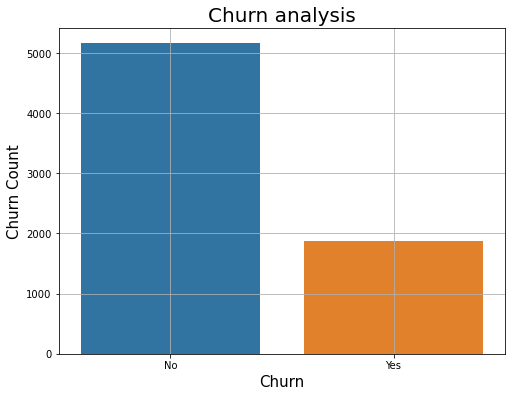

In [14]:
# Plotting a Count Chart with Gender along the X-axis and Churn Count along the Y-axis
plt.figure(figsize = (8,6))
sns.countplot(x='Churn',data=Churn_Data_01)
plt.xlabel("Churn", fontsize='15')
plt.ylabel("Churn Count", fontsize='15')
plt.title("Churn analysis", fontsize='20')
plt.grid()
plt.show()

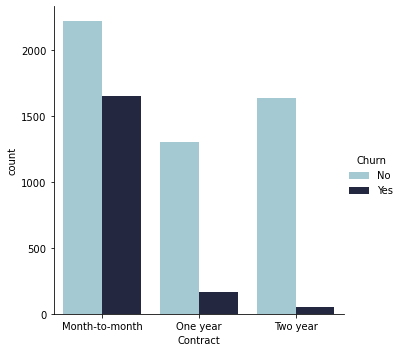

In [15]:
# Category plot
sns.catplot(x="Contract", hue="Churn", kind="count", palette="ch:rot=-.2,hue=1,light=.75", data=Churn_Data_01)

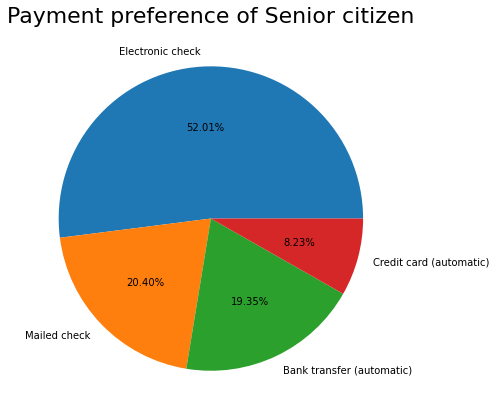

In [16]:
# Plotting Pie chart
fig = plt.figure(figsize=(10,7))
plt.pie(Churn_Data_01.loc[Churn_Data_01['SeniorCitizen'] == 1, ['PaymentMethod']].value_counts().to_list(), labels = list(Churn_Data_01['PaymentMethod'].unique()),autopct='%1.2f%%')
plt.title(label="Payment preference of Senior citizen",
          loc="center",
          fontsize=22)
plt.show()

### Insights:
1. Our dataset is much imbalanced in nature
2. Most of the customers prefer Month-to-month contract
3. Electronic check is the most opted payment methods among others

3. Label Encoding

In [17]:
# Getting a list of column names from feature dataframe which are suitable for label encoding
Churn_Data_01_Cols = []
for i in list(Churn_Data_01.columns):
    if Churn_Data_01[i].dtype == 'O':
        Churn_Data_01_Cols.append(i)
        
print('The below given list of columns needs a Label Encoding:\n',Churn_Data_01_Cols)

The below given list of columns needs a Label Encoding:
 ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [18]:
# Creating a label encoded dataframe of the targeted columns with the help of LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
Label_Enc= LabelEncoder()
temp_df=pd.DataFrame()
temp_df2=pd.DataFrame()
for k in Churn_Data_01_Cols:
    l=Churn_Data_01[k].values
    l=Label_Enc.fit_transform(l)
    name_mapping = dict(zip(Label_Enc.classes_, Label_Enc.transform(Label_Enc.classes_)))
    print("Format of encoded data in {} column : {}".format(k, ', '.join("{}: {}".format(k, v) for k, v in name_mapping.items())))
    temp_df2=pd.DataFrame(l, columns=[str(k)])
    temp_df = pd.concat([temp_df, temp_df2], axis=1)

Format of encoded data in gender column : Female: 0, Male: 1
Format of encoded data in Partner column : No: 0, Yes: 1
Format of encoded data in Dependents column : No: 0, Yes: 1
Format of encoded data in PhoneService column : No: 0, Yes: 1
Format of encoded data in MultipleLines column : No: 0, No phone service: 1, Yes: 2
Format of encoded data in InternetService column : DSL: 0, Fiber optic: 1, No: 2
Format of encoded data in OnlineSecurity column : No: 0, No internet service: 1, Yes: 2
Format of encoded data in OnlineBackup column : No: 0, No internet service: 1, Yes: 2
Format of encoded data in DeviceProtection column : No: 0, No internet service: 1, Yes: 2
Format of encoded data in TechSupport column : No: 0, No internet service: 1, Yes: 2
Format of encoded data in StreamingTV column : No: 0, No internet service: 1, Yes: 2
Format of encoded data in StreamingMovies column : No: 0, No internet service: 1, Yes: 2
Format of encoded data in Contract column : Month-to-month: 0, One year:

In [19]:
# Replacing the original columns in the feature dataframe with encoded columns
import warnings
warnings.filterwarnings("ignore")
Churn_Data_01[Churn_Data_01_Cols]=temp_df[Churn_Data_01_Cols]
# Sample preview of the feature dataframe
Churn_Data_01.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5122,1,0,0,0,8,0,1,0,2,0,0,0,0,0,0,1,2,30.45,226.45,1
2676,1,0,1,0,46,0,1,0,2,0,2,2,0,0,2,0,1,40.40,1842.70,0
4134,0,1,0,0,35,0,1,0,0,0,2,0,2,0,0,1,2,39.85,1434.60,0
1687,1,0,1,1,39,0,1,0,0,0,0,0,0,0,1,1,1,25.25,947.75,0
4618,0,1,0,0,63,1,2,1,0,0,2,0,0,2,0,1,0,89.60,5538.80,0


4. Heatmap of Correlation matrix of the features

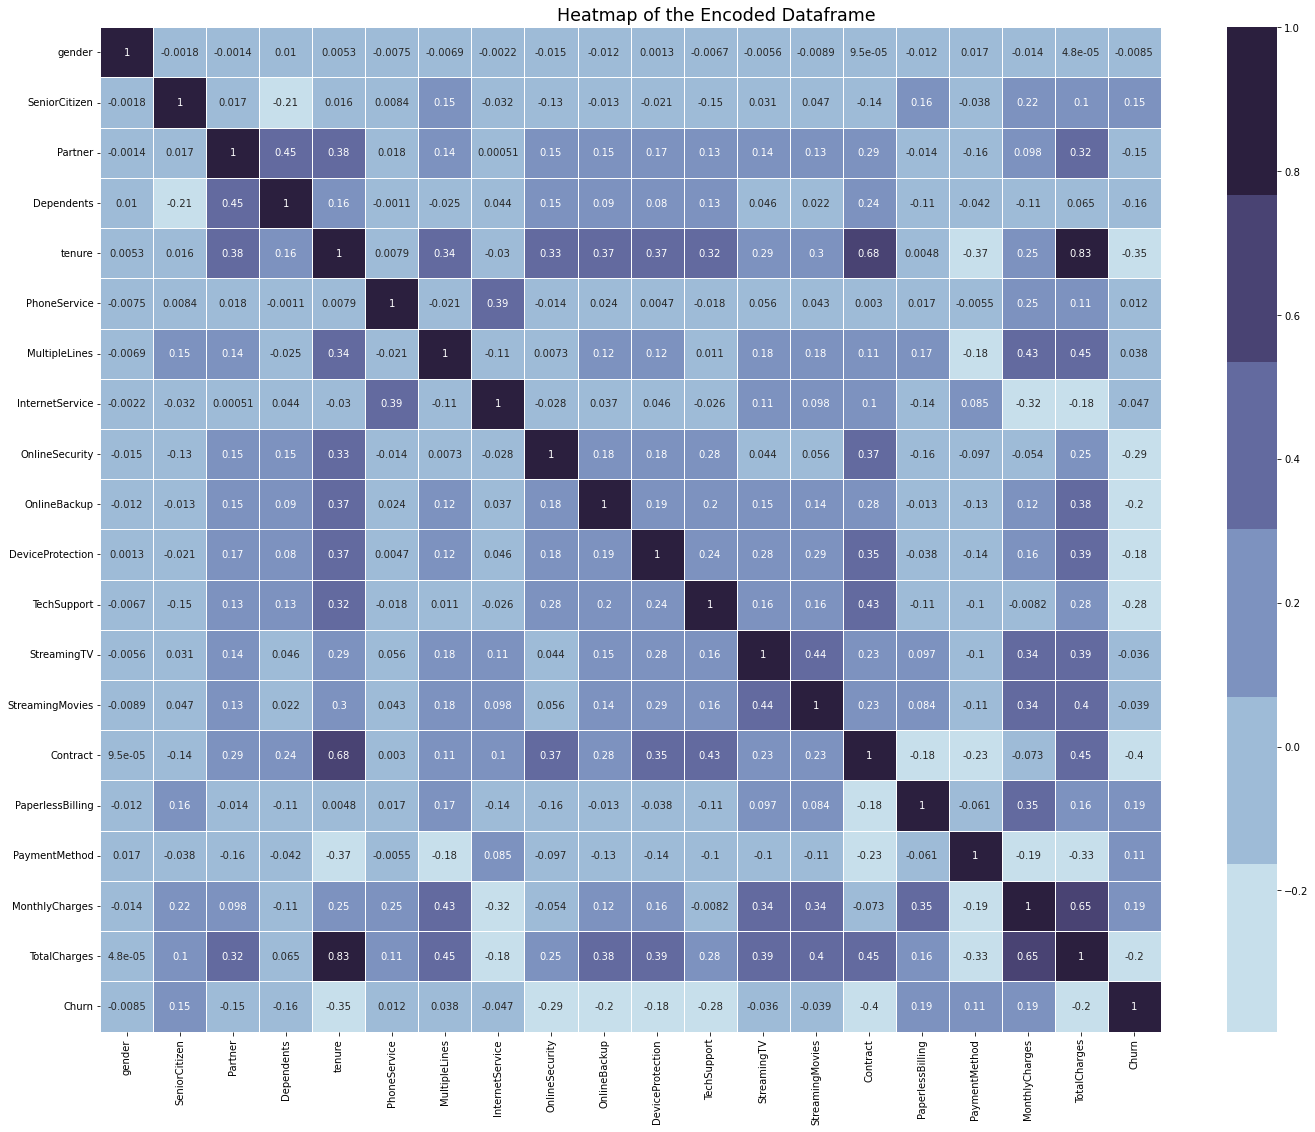

In [20]:
# Calculating the Correlation matrix using DataFrame.corr()
corrmatrix = Churn_Data_01.corr()
# Creating Heatmap using seaborn & Correlation matrix
f, ax = plt.subplots(figsize=(20, 16))
f.suptitle('Heatmap of the Encoded Dataframe', fontsize=17.5)
colormap = sns.color_palette('ch:s=.25,rot=-.25')
sns.heatmap(corrmatrix, annot=True, linewidth=0.75, cmap=colormap)
f.tight_layout()

In [21]:
# Dropping Highly correlated columns
Churn_Data_01 = Churn_Data_01.drop(columns=["tenure"])

In [22]:
Churn_Data_01.sample(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6789,0,0,1,0,1,0,1,2,2,0,2,2,2,1,0,3,105.95,1348.9,1
5420,0,0,1,1,1,2,0,2,2,2,2,0,2,2,1,0,79.50,5661.7,0
40,1,0,1,1,1,0,0,0,2,0,0,0,0,1,0,3,49.55,475.7,0
4894,0,0,0,0,1,0,0,2,0,0,2,0,0,0,0,1,56.35,1381.2,0
3701,1,0,1,1,1,0,2,1,1,1,1,1,1,2,0,0,19.90,1356.7,0


## Task 03

*Modelling & Model fine tuning*

In [23]:
# Splitting the Dataframe
# Independent variables
X = Churn_Data_01.drop(['Churn'], axis=1)
# Dependent variables
y = Churn_Data_01.Churn

In [24]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.20, random_state=42)

In [46]:
from imblearn import under_sampling, over_sampling

from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

ModuleNotFoundError: No module named 'imblearn'

Importing necessary modules from SkLearn Library

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from collections import Counter

**Here we are comparing the efficiency of 5 Classification models such as Logistic, KNC, Naive Bayes (Gaussian), Random Forest & Gradient Boosting Classifier with Accuracy Score**

In [26]:
stages = []
stages.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
stages.append(('ScaledKNC', Pipeline([('Scaler', StandardScaler()),('KNC', KNeighborsClassifier())])))
stages.append(('ScaledGNB', Pipeline([('Scaler', StandardScaler()),('GNB',GaussianNB())])))
stages.append(('ScaledRFC', Pipeline([('Scaler', StandardScaler()),('RFC', RandomForestClassifier())])))
stages.append(('ScaledGBC', Pipeline([('Scaler', StandardScaler()),('GBC', GradientBoostingClassifier())])))
results = []
names = []
for name, model in stages:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    Model_list = "{}: {:.2f}% with STD of {:.3f}".format(name, cv_results.max()*100, cv_results.std())
    print("Maximum Accuracy of",Model_list)

Maximum Accuracy of ScaledLR: 81.49% with STD of 0.014
Maximum Accuracy of ScaledKNC: 77.26% with STD of 0.016
Maximum Accuracy of ScaledGNB: 78.83% with STD of 0.016
Maximum Accuracy of ScaledRFC: 80.78% with STD of 0.010
Maximum Accuracy of ScaledGBC: 83.27% with STD of 0.013


Checking the Gradient Boosting Classifier Model's Accuracy Score for various values of n_estimators

In [27]:
scaler = StandardScaler().fit(X_train)
X_Scaled = scaler.transform(X_train)
parameter_grid = dict(n_estimators=np.array([50,100,200,300,400]))
GBModel = GradientBoostingClassifier(random_state=42)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
grid = GridSearchCV(estimator=GBModel, param_grid=parameter_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(X_Scaled, y_train)
Means = grid_result.cv_results_['mean_test_score']
Stds = grid_result.cv_results_['std_test_score']
Parameters = grid_result.cv_results_['params']
for mean, stdev, param in zip(Means, Stds, Parameters):
    print("Mean Accuracy of {:.2f}% (with STD: {:.3f}) with parameter, {}".format(mean*100, stdev, ''.join("{}: {}".format(k, v) for k, v in param.items())))

print("Perfect out of them: {:.2f} paired with {}".format(grid_result.best_score_*100, grid_result.best_params_))

Mean Accuracy of 80.46% (with STD: 0.017) with parameter, n_estimators: 50
Mean Accuracy of 80.32% (with STD: 0.013) with parameter, n_estimators: 100
Mean Accuracy of 80.21% (with STD: 0.012) with parameter, n_estimators: 200
Mean Accuracy of 79.86% (with STD: 0.011) with parameter, n_estimators: 300
Mean Accuracy of 79.77% (with STD: 0.011) with parameter, n_estimators: 400
Perfect out of them: 80.46 paired with {'n_estimators': 50}


In [28]:
# Standard scaling the Dataset
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50)
model.fit(X_train_scaled, y_train)

# Transforming the dataset for validation
X_test_scaled = scaler.transform(X_test)
Predictions = model.predict(X_test_scaled)
print ("Accuracy of our model is: {:.2f}%".format(accuracy_score(y_test, Predictions)*100))

Accuracy of our model is: 78.68%


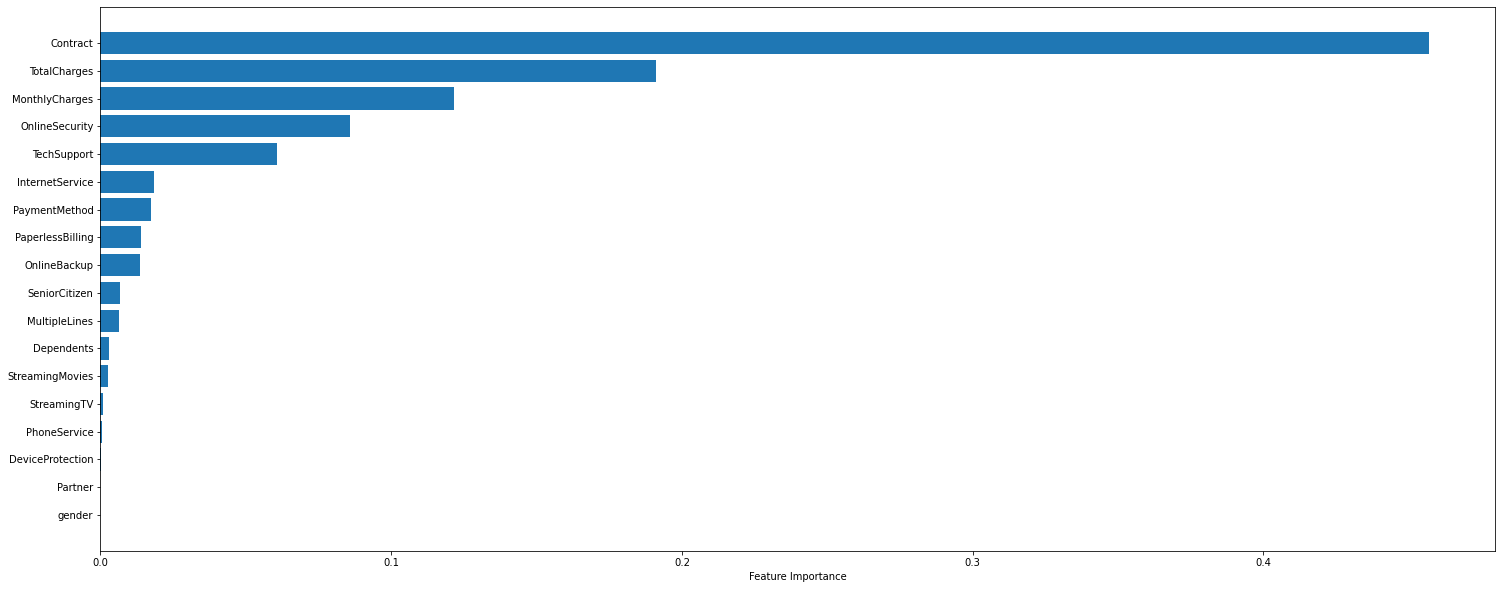

In [29]:
from sklearn.inspection import permutation_importance
sort = model.feature_importances_.argsort()
fig, ax = plt.subplots(figsize=(25, 10))
plt.barh(Churn_Data_01.columns[sort], model.feature_importances_[sort])
plt.xlabel("Feature Importance")
plt.show()

In [30]:
# Dropping less relavant columns
Churn_Data_01 = Churn_Data_01.drop(columns=["DeviceProtection", "Partner", "gender"])
Churn_Data_01.sample(5)

,SeniorCitizen,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5629,0,0,1,0,2,1,1,1,1,1,0,0,2,19.95,19.95,1
2051,0,0,1,2,1,0,2,0,0,0,0,0,0,81.00,4085.75,0
1983,1,0,1,2,1,2,2,0,2,2,1,1,2,108.85,6287.25,1
958,0,0,1,0,2,1,1,1,1,1,1,1,3,20.50,365.80,0
3306,0,0,0,1,0,2,2,0,2,0,0,1,2,44.80,2104.55,0


In [31]:
# Saving the dataframe into CSV format
Churn_Data_01.to_csv('Churn_Data_Final.csv', index=False)

In [32]:
# Splitting the Dataframe
# Independent variables
X = Churn_Data_01.drop(['Churn'], axis=1)
# Dependent variables
y = Churn_Data_01.Churn

In [33]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.20, random_state=42)

In [34]:
# Standard scaling the Dataset
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50)
model.fit(X_train_scaled, y_train)

# Transforming the dataset for validation
X_test_scaled = scaler.transform(X_test)
Predictions = model.predict(X_test_scaled)
print ("Accuracy of our model is: {:.2f}%".format(accuracy_score(y_test, Predictions)*100))

Accuracy of our model is: 78.82%


In [35]:
#pip install imbalanced-learn

In [36]:
#pip install -U imbalanced-learn

In [37]:
#conda install -c conda-forge imbalanced-learn

In [38]:
#conda install -c glemaitre imbalanced-learn

In [45]:
from imblearn import under_sampling, over_sampling

from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

ModuleNotFoundError: No module named 'imblearn'

## Summary

Comparing the predicted data with test data out from a sample dataset of 10 Rows

In [ ]:
validator = pd.DataFrame({'Predicted Data': Predictions, 'Test Data' : y_test})
validator.sample(10)

,Predicted Data,Test Data
2707,0,0
4385,1,1
4201,0,0
2072,1,1
5031,1,1
1253,0,0
3180,1,1
2667,0,0
5881,0,0
1462,0,0


### Metrics Info:
1. Max accuracy achieved : 83.10%
2. Optimal accuracy achieved : 80.50%

In [ ]:
# calculate the accuracy score
from sklearn.metrics import precision_score, recall_score, f1_score
print('Accuracy on training set:', round(model.score(X_train, y_train),2))
print('Accuracy on test set:', round(accuracy_score(y_test, Predictions),2))
print('Precision score on test set:', round(precision_score(y_test, Predictions, average='micro'),2))
print('Recall score on test set:', round(recall_score(y_test, Predictions, average='micro'),2))
print('F1 score on test set:', round(f1_score(y_test, Predictions, average='micro'),2))

Accuracy on training set: 0.73
Accuracy on test set: 0.79
Precision score on test set: 0.79
Recall score on test set: 0.79
F1 score on test set: 0.79


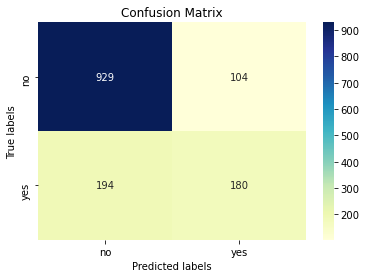

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix as CM     

ax= plt.subplot()
cm = CM(y_test.values, Predictions)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], ax=ax, cmap="YlGnBu");  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 